In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

%matplotlib inline

import keras
from keras.models import Sequential
from keras import regularizers
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical


print(os.listdir("../input"))

Using TensorFlow backend.


['asl_dataset (2)']


In [2]:
path = "../input/asl_dataset (2)/asl_dataset"

In [3]:
dirs = os.listdir(path)
unique_labels = dirs

In [4]:
label_dict = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8,
    '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16,
    'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24,
    'p': 25, 'q': 26, 'r': 27, 's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32,
    'x': 33, 'y': 34, 'z': 35,
}

In [5]:
size = 200,200

def load_dataset(path):
    image_data = list()
    labels = list()
    dirs = os.listdir(path)
    
    for Dir in dirs:
        print("Loading images for: ", Dir)
        path_img = path+'/'+Dir
        images = os.listdir(path_img)
        for image in images:
            temp_img = cv2.imread(path_img+'/'+image)
            temp_img = cv2.resize(temp_img, size)
            image_data.append(temp_img)
            labels.append(label_dict[Dir])
            
    return image_data, labels
        

In [6]:
images, labels = load_dataset(path)

Loading images for:  r
Loading images for:  i
Loading images for:  9
Loading images for:  f
Loading images for:  e
Loading images for:  6
Loading images for:  1
Loading images for:  l
Loading images for:  7
Loading images for:  2
Loading images for:  g
Loading images for:  y
Loading images for:  t
Loading images for:  d
Loading images for:  a
Loading images for:  q
Loading images for:  o
Loading images for:  m
Loading images for:  3
Loading images for:  u
Loading images for:  j
Loading images for:  k
Loading images for:  v
Loading images for:  c
Loading images for:  h
Loading images for:  x
Loading images for:  s
Loading images for:  z
Loading images for:  n
Loading images for:  b
Loading images for:  p
Loading images for:  0
Loading images for:  4
Loading images for:  w
Loading images for:  8
Loading images for:  5


In [7]:
images = np.array(images)
images = images.astype('float32')/255.0

labels = to_categorical(labels)

In [8]:
print("Shape of image data: ", images.shape)
print("shape of labels: ", labels.shape)

Shape of image data:  (2515, 200, 200, 3)
shape of labels:  (2515, 36)


In [9]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [7,7], padding = 'valid', activation = 'relu', input_shape = (200,200,3)))
    model.add(Conv2D(32, kernel_size = [5,5], padding = 'valid', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [2,2]))
    
    model.add(Conv2D(64, kernel_size = [5,5], padding = 'valid', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(64, kernel_size = [5,5], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(36, activation = 'softmax'))
    
    print("MODEL CREATED")
    return model

In [10]:
model = create_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
MODEL CREATED


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 194, 194, 16)      2368      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 190, 190, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 95, 95, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 91, 91, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
__________

In [12]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [13]:
model_hist = model.fit(images, labels, batch_size = 32, epochs = 25, validation_split = 0.01)

Instructions for updating:
Use tf.cast instead.
Train on 2489 samples, validate on 26 samples
Epoch 1/25
2489/2489 [==============================] - 9s 4ms/step - loss: 2.1632 - acc: 0.5942 - val_loss: 2.6599 - val_acc: 0.5769
Epoch 2/25
2489/2489 [==============================] - 4s 2ms/step - loss: 1.1741 - acc: 0.8228 - val_loss: 0.6573 - val_acc: 1.0000
Epoch 3/25
2489/2489 [==============================] - 4s 2ms/step - loss: 0.8952 - acc: 0.8943 - val_loss: 1.0359 - val_acc: 0.8846
Epoch 4/25
2489/2489 [==============================] - 4s 2ms/step - loss: 0.7541 - acc: 0.9285 - val_loss: 0.5387 - val_acc: 1.0000
Epoch 5/25
2489/2489 [==============================] - 4s 2ms/step - loss: 0.6774 - acc: 0.9353 - val_loss: 1.0390 - val_acc: 0.8846
Epoch 6/25
2489/2489 [==============================] - 4s 2ms/step - loss: 0.5848 - acc: 0.9578 - val_loss: 0.5567 - val_acc: 0.9615
Epoch 7/25
2489/2489 [==============================] - 4s 2ms/step - loss: 0.5298 - acc: 0.9646 - val

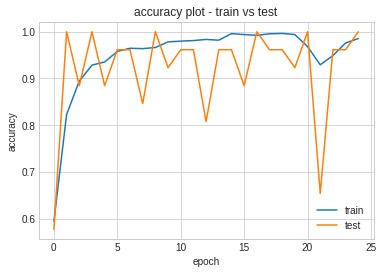

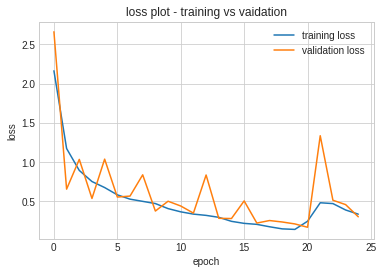

In [14]:
def plot_accuracy(y):
    if(y == True):
        plt.plot(model_hist.history['acc'])
        plt.plot(model_hist.history['val_acc'])
        plt.legend(['train', 'test'], loc='lower right')
        plt.title('accuracy plot - train vs test')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.show()
    else:
        pass
    return

def plot_loss(y):
    if(y == True):
        plt.plot(model_hist.history['loss'])
        plt.plot(model_hist.history['val_loss'])
        plt.legend(['training loss', 'validation loss'], loc = 'upper right')
        plt.title('loss plot - training vs vaidation')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()
    else:
        pass
    return


plot_accuracy(True)
plot_loss(True)

In [15]:
model.save('asl_model_better.h5')